# Linear Regression Problem Multible Variables

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("ex1data2.txt", names = ["Size of House","Number of bedrooms","Price of the House"])
data.head()

,Size of House,Number of bedrooms,Price of the House
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
X = data.iloc[:,:2]
y = data.iloc[:,2:]
m=len(y)

In [5]:
y.tail()

,Price of the House
42,314000
43,299000
44,179900
45,299900
46,239500


In [6]:
def FeatureNormalize(X):
    """
    For better solution we are using this method.We will use the function below to normalize our features. 
    The method we use is to subtract each feature from its mean and then divide by its standard deviation.
    
    """
    
    
    Xnorm = (X-np.mean(X))/np.std(X) ## scaling
    mu = np.mean(X)
    sigma = np.std(X)
    
    return Xnorm, mu, sigma ##Our values
        

In [7]:
X, mean, std = FeatureNormalize(X)

In [8]:
# Adding ones columns to X and reshape X and y and choose initial values of theta
X = np.append(np.ones([m,1]),X ,axis=1)
y = np.array(y).reshape(-1,1)
theta = np.zeros([3,1])

In [9]:
def costComputationMulti(X,y,theta):
    """Compute cost for linear regression with multiple variables"""
    
    
    m = len(y)
    
    
    pred = X.dot(theta) #Prediction of hypothesis on all m examples
    
    J = 1/(2*m)*(np.sum((pred-y)**2))
    
    return J


In [12]:
costml = costComputationMulti(X,y,theta)

print(f"Our current cost is {costml}")

Our current cost is 65591548106.45744


In [13]:
def gradientDescentmulti(X, y, theta, alpha, iter):
    '''
    This function takes in the training data, the intial theta values(coefficients), the learning rate, 
    and the number of iterations. The output will be the a new set of coefficeient of the linear regression (theta),
    optimized for making predictions.
    '''
    
    J_history = []## Array for storing the cost values on each iteration.
    m = len(y)## This is the length of the training set
    
    for i in range(iter): ## Loop for 400 iterations
        h = X.dot(theta) ## The hypothesis
        theta = theta - (alpha/m)*(X.T.dot(h-y))   #Gradient descent function
        J_history.append(costComputationMulti(X, y, theta))  #Append the cost to the J_history array
    return theta, J_history     #return the final values of theta and the J_history array



In [16]:
iter = 400 ## Initialize the iteration parameter.
alpha = 0.01 ## Initialize the learning rate.

## Call the function and pass in the parameters to compute new coefficient values.
new_theta, J_history = gradientDescentmulti(X, y, theta, alpha, iter) 

print(f"Our new theta values is equal to :{new_theta}")

Our new theta values is equal to :[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [17]:
cost_new = costComputationMulti(X,y,new_theta)

print(f"Our new cost value is equal to {cost_new}")

Our new cost value is equal to 2105448288.6292474


Text(0.5, 1.0, 'Min. Cost Using Gradient Descent')

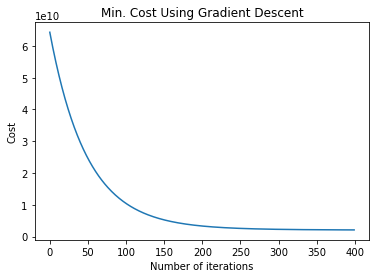

In [18]:
plt.plot(J_history)
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.title('Min. Cost Using Gradient Descent')


This above graph shows us how our cost is changing according to do iteration. 
After the 200th iterations then it kind of flattened out. 
This also proves the gradient descent algorithm performed well. 

In [21]:
theta1, J_history1 = gradientDescentmulti(X, y, theta, 0.3, 50)
theta2, J_history2 = gradientDescentmulti(X, y, theta, 0.1, 50)
theta3, J_history3 = gradientDescentmulti(X, y, theta, 0.04, 50)
theta4, J_history4 = gradientDescentmulti(X, y, theta, 0.01, 50)
theta5, J_history5 = gradientDescentmulti(X, y, theta, 0.5, 50)

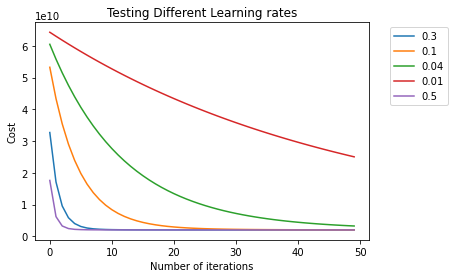

In [22]:
plt.plot(J_history1, label="0.3")
plt.plot(J_history2, label="0.1")
plt.plot(J_history3, label="0.04")
plt.plot(J_history4, label="0.01")
plt.plot(J_history5, label="0.5")
plt.title("Testing Different Learning rates")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.25, 1.0))

The graph shows that the curve in purple, which represents a learning rate of 0.5 converges faster than all the other curves. Therefore the best learning rate for this model is 0.5.

In [23]:
## Best learning rate is 0.5 and we'll use it

theta , J_history = gradientDescentmulti(X,y,theta,0.5,1500)

print(theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [24]:
## Prediction
## We will predict a house with an 1650 sq feet and 3 bedrooms.
X = np.array ([1650, 3])

In [25]:
X = (X-mean)/std

In [26]:
X = np.append(1,X)

In [27]:
X = np.reshape(X, (1,3))
print(X)

[[ 1.         -0.44604386 -0.22609337]]


In [28]:
def predict(X,theta):
    """This func. help us for prediction the price of house """
    return np.dot(X,theta)

In [33]:
p = predict(X,theta)
print(f"This our prediction of a house with an 1650 sq feet and 3 bedrooms : {float(p)} USD")

This our prediction of a house with an 1650 sq feet and 3 bedrooms : 293081.4643348961 USD
